In [1]:
#!pip install orm
#!pip install pony
import sqlite3
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        margin:auto;
    }
.output_html {
        display: table-cell;
        text-align: center;
        margin:auto;
    }
.output_area {
        display: table-cell;
        text-align: center;
        margin:auto;
    }

</style>
""")
#from datetime import datetime

In [2]:
conn = sqlite3.connect('tweets.sqlite')
cliente=6

In [3]:
cur = conn.cursor()
sql = ("SELECT datatime_reacao,sentimento FROM reacao where id_cliente = " + str(cliente) + " and sentimento=1")
df_p = pd.read_sql_query(sql, conn) 
#pd.set_option('max_colwidth',150)
df_p['Semana']=pd.to_datetime(df_p['datatime_reacao']).dt.week
#df_p['Semana']=pd.to_datetime(df_p['datatime_reacao'], unit='s').dt.week
df_p.pop('datatime_reacao')
df_p.pop('sentimento')
df_p['Positivo']='Positivo'

In [4]:
cur = conn.cursor()
sql = ("SELECT datatime_reacao,sentimento FROM reacao where id_cliente = " + str(cliente) + " and sentimento=-1")
df_n = pd.read_sql_query(sql, conn) 
df_n['Semana']=pd.to_datetime(df_n['datatime_reacao']).dt.week
df_n.pop('datatime_reacao')
df_n.pop('sentimento')
df_n['Negativo']='Negativo'
#df_n.groupby('Semana').count().T

In [5]:
df_graf_p = df_p.groupby('Semana').count()

In [6]:
df_graf_n = df_n.groupby('Semana').count()

In [7]:
df_graf = pd.concat([df_graf_p, df_graf_n], axis=1)
df_graf = df_graf.fillna(0)

In [8]:
aux = df_graf['Positivo'].max().astype(int)
if math.isnan(df_graf['Negativo'].max())==False:
    if aux < df_graf['Negativo'].max().astype(int):
        aux = df_graf['Negativo'].max().astype(int)

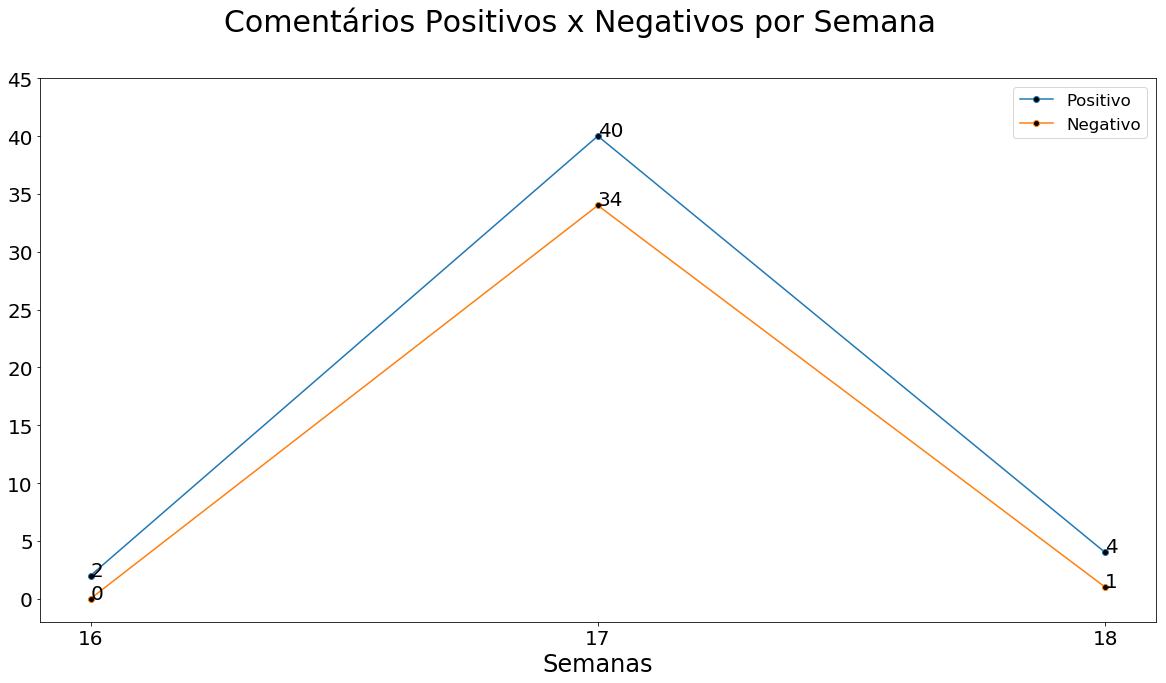

In [10]:
df_graf.plot(linestyle='-', marker='o', markerfacecolor='black',figsize=(20,10))
plt.rc("font", size=20)
plt.suptitle('Comentários Positivos x Negativos por Semana', fontsize=30)
x=df_graf.groupby('Semana').count().T.columns.values
y=range(0,int(aux+10),5)
plt.xticks(x, size=20)
plt.yticks(y, size=20)

p=df_graf.Positivo.T.values
n=df_graf.Negativo.T.values

for xp in zip(x, p): 
    plt.annotate('%s' % str(int(xp[1])), xy=xp, textcoords='data') 

for xn in zip(x, n): 
    plt.annotate('%s' % str(int(xn[1])), xy=xn, textcoords='data') 

plt.xlabel("Semanas", size=24)
plt.legend(fontsize='small')
plt.show()

In [11]:
df_graf['% Positivo'] = round(df_graf.Positivo/(df_graf.Positivo + df_graf.Negativo)*100,2)
df_graf['% Negativo'] = round(df_graf.Negativo/(df_graf.Positivo + df_graf.Negativo)*100,2)

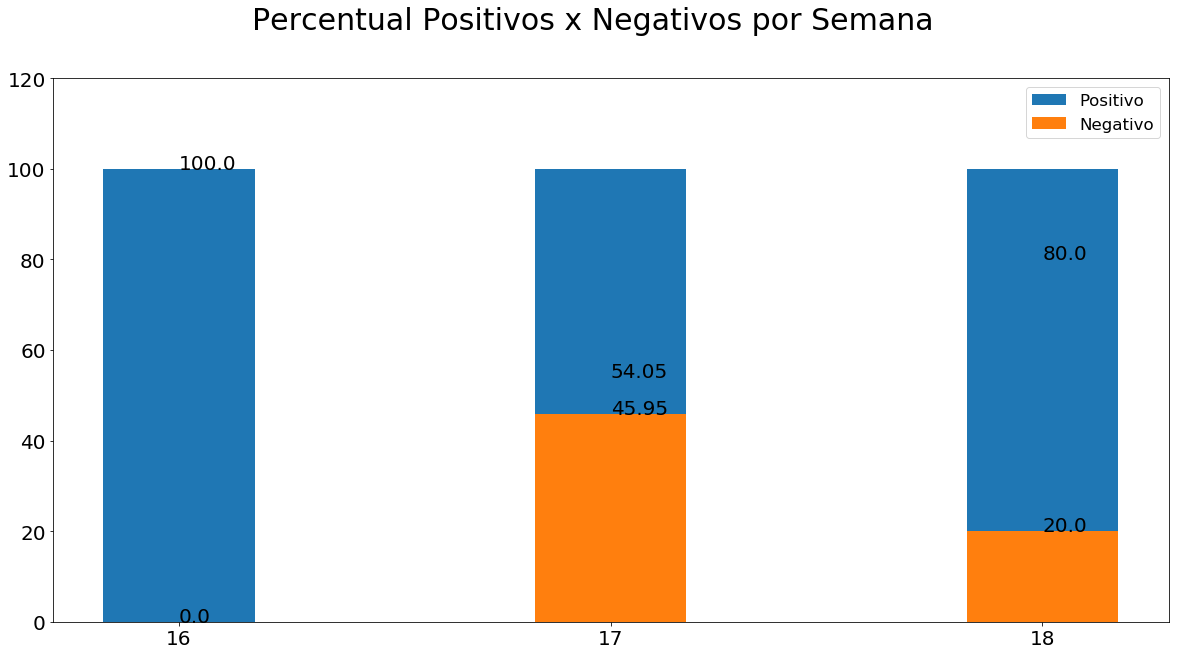

In [15]:
import numpy as np

x = np.array([100.0])
ind =df_graf.groupby('Semana').count().T.columns.values

plt.figure(figsize=(20,10))
plt.suptitle('Percentual Positivos x Negativos por Semana', fontsize=30)
p1 = plt.bar(ind, np.repeat(x, [len(ind)], axis=0), 0.35)
p2 = plt.bar(ind, df_graf['% Negativo'].T.values, 0.35)

p=df_graf['% Positivo'].T.values
n=df_graf['% Negativo'].T.values

for xp in zip(ind, p): 
    plt.annotate('%s' % str(round(xp[1],2)), xy=xp, xytext=(xp[0], xp[1]), textcoords='data') 

for xn in zip(ind, n): 
    plt.annotate('%s' % str(round(xn[1],2)), xy=xn, xytext=(xn[0], xn[1]),textcoords='data') 
    
plt.xticks(ind, size=20)
plt.yticks([0,20,40,60,80,100,120], size=20)
plt.legend((p1, p2), ('Positivo', 'Negativo'),fontsize='small')
plt.show()

In [14]:
cur = conn.cursor()
sql = ("SELECT datatime_reacao, reacao, fonte as [Rede Social] FROM reacao, fonte where fonte.id = reacao.id_fonte and id_cliente = " + str(cliente) + " and sentimento=-1 order by datatime_reacao desc")
df_n = pd.read_sql_query(sql, conn) 
df_n['Semana']=pd.to_datetime(df_n['datatime_reacao']).dt.week
df_n['Data']=pd.to_datetime(df_n['datatime_reacao']).dt.strftime('%d/%m/%Y %H:%M')
df_n['Comentário']=df_n['reacao']
df_n.pop('reacao')
df_n.pop('datatime_reacao')
pd.set_option('max_colwidth',150)
d = dict(selector="th",
    props=[('text-align', 'center')])

df_n.style.set_properties(**{'text-align':'center'}).set_table_styles([d])
#df_n

,Rede Social,Semana,Data,Comentário
0,Twitter,18,30/04/2018 20:57,"Amiguinhos, deixa o tio falar uma coisa com vocês. Vitorinha não tem demanda pra linha verde. Quer evolução desse tipo? Vai pra São Paulo."
1,Twitter,17,28/04/2018 22:05,@gazetaonline Olha está linha verde tumulto no trânsito fica inevitável
2,Twitter,17,27/04/2018 02:28,RT @gazetaonline: Teste de ampliação da Linha Verde congestiona trânsito em Vitória nesta quarta-feira (25)➡️ https://t.co/rrevsYlM57 https…
3,Twitter,17,27/04/2018 01:38,"@gazetaonline Essa ""linha verde"" é uma piada de muito mal gosto, pra dizer melhor ""uma ideia de girico"" quem inventou isso só pode ser ����"
4,Twitter,17,27/04/2018 00:08,@mari_lcoutinho Tá demorando mais por causa da linha verde
5,Twitter,17,26/04/2018 22:34,"Mp, playboy fica bolado por causa da linha verde, mas quero ver ficar no busão lotado, no trânsito, cansado e não reclamar ainda"
6,Twitter,17,26/04/2018 22:34,E a prefeitura de Vitoria e o senhor @LucianoRezende vão cometer a BURRICE de aumentar a linha verde
7,Twitter,17,26/04/2018 21:24,@cbnvitoria @VixNoTransito Trânsito todo parado e tem gente defendendo linha verde sou taxi posso usar mas NÃO CONS… https://t.co/YuImX6etwb
8,Twitter,17,26/04/2018 20:57,Um ranço por essa tal de Linha Verde! Não tem mais que inventar ... ENTÃO NÃO INVENTA . https://t.co/JiY8MURAAZ
9,Twitter,17,26/04/2018 20:51,Extensão da Linha Verde: lentidão para quem não usa faixa exclusiva ➡️ https://t.co/XDOGsocHme https://t.co/X3E3psK3fz
